In [1]:
import pandas as pd

solar_data = pd.read_csv('solarpower.csv')
solar_data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [2]:
import pandas as pd

cum_power_filled = solar_data['cum_power'].copy()

missing_indices = cum_power_filled[cum_power_filled == -1].index

for i in missing_indices:
    prev_val = cum_power_filled.iloc[i - 1] if i > 0 else None
    next_val = cum_power_filled.iloc[i + 1] if i < len(cum_power_filled) - 1 else None
    
    if prev_val is not None and next_val is not None and prev_val != -1 and next_val != -1:
        cum_power_filled.iloc[i] = (prev_val + next_val) / 2



mean_filled = cum_power_filled.mean()


result = round(mean_filled)

print(result)

23848


In [3]:
import pandas as pd


solar_data['date'] = pd.to_datetime(solar_data['date'])


solar_data = solar_data.sort_values('date')

solar_data['day_power'] = solar_data['cum_power'].diff()


solar_data['year_month'] = solar_data['date'].dt.to_period('M')

monthly_avg = solar_data.groupby('year_month')['day_power'].mean().reset_index()

march_2017_avg = monthly_avg[monthly_avg['year_month'] == pd.Period('2017-03')]


result = round(march_2017_avg['day_power'].values[0])

print(result)

11


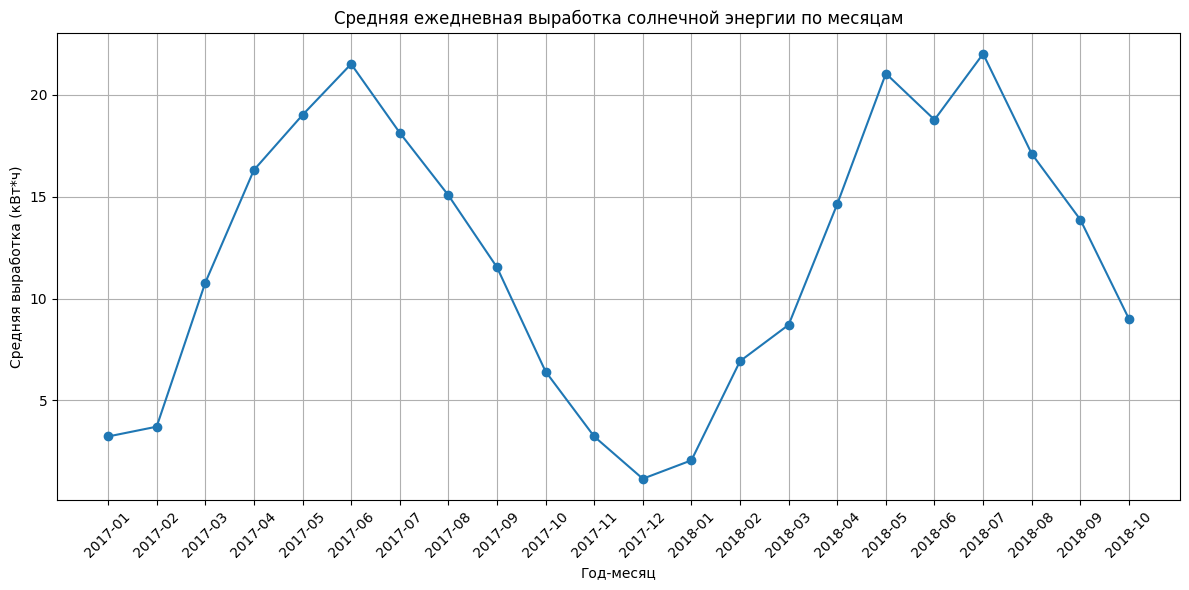

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


solar_data['date'] = pd.to_datetime(solar_data['date'])
df = solar_data.sort_values('date')

df['day_power'] = df['cum_power'].diff()

df['year_month'] = df['date'].dt.to_period('M')

monthly_avg = df.groupby('year_month')['day_power'].mean().reset_index()

monthly_avg['year_month'] = monthly_avg['year_month'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['year_month'], monthly_avg['day_power'], marker='o', linestyle='-')
plt.title('Средняя ежедневная выработка солнечной энергии по месяцам')
plt.xlabel('Год-месяц')
plt.ylabel('Средняя выработка (кВт*ч)')
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()